# Los datos

## Carga de datos y descripción

In [1]:
import pandas as pd

In [2]:
path = r'~/Documents/GitHub/Supervisado/dataset/datos0.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,habitantes,ingresos,analfabetismo,esp_vida,asesinatos,universitarios,heladas,area,densidad_pobl
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,71.290526
1,365,6315,1.5,69.31,11.3,66.7,152,566432,0.644385
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,19.503249
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,40.619886
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,135.570890


Información de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   habitantes      50 non-null     int64  
 1   ingresos        50 non-null     int64  
 2   analfabetismo   50 non-null     float64
 3   esp_vida        50 non-null     float64
 4   asesinatos      50 non-null     float64
 5   universitarios  50 non-null     float64
 6   heladas         50 non-null     int64  
 7   area            50 non-null     int64  
 8   densidad_pobl   50 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 3.6 KB


Descripción de los datos

In [5]:
df.describe()

,habitantes,ingresos,analfabetismo,esp_vida,asesinatos,universitarios,heladas,area,densidad_pobl
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,4246.420000,4435.800000,1.170000,70.878600,7.37800,53.108000,104.460000,70735.880000,149.224473
std,4464.491433,614.469939,0.609533,1.342394,3.69154,8.076998,51.980848,85327.299622,221.006340
min,365.000000,3098.000000,0.500000,67.960000,1.40000,37.800000,0.000000,1049.000000,0.644385
25%,1079.500000,3992.750000,0.625000,70.117500,4.35000,48.050000,66.250000,36985.250000,25.335165
50%,2838.500000,4519.000000,0.950000,70.675000,6.85000,53.250000,114.500000,54277.000000,73.015433
75%,4968.500000,4813.500000,1.575000,71.892500,10.67500,59.150000,139.750000,81162.500000,144.282783
max,21198.000000,6315.000000,2.800000,73.600000,15.10000,67.300000,188.000000,566432.000000,975.003324


In [6]:
df.isna().sum().sort_values()

habitantes        0
ingresos          0
analfabetismo     0
esp_vida          0
asesinatos        0
universitarios    0
heladas           0
area              0
densidad_pobl     0
dtype: int64

## Análisis gráfico y correlación

Relación gráfica

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

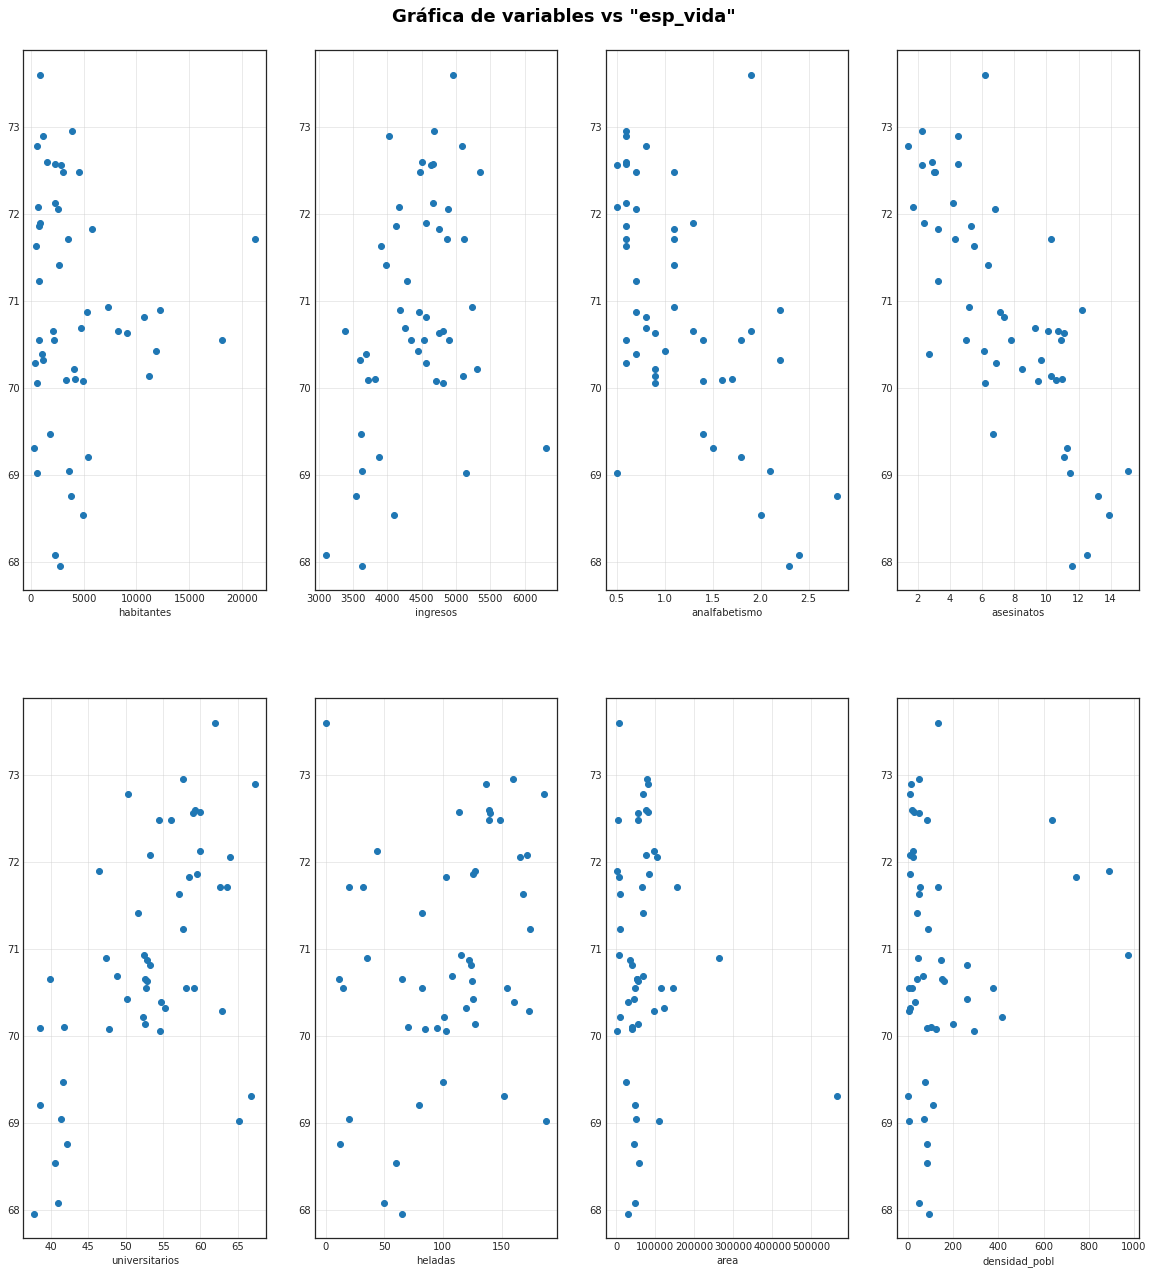

In [8]:
columns_names_list = list(df.columns.values)
columns_names_list.remove('esp_vida')

i = 0

with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(20, 20))
    
    for a in columns_names_list:
        plt.subplot(2, 4, i+1)
        plt.scatter(df[[columns_names_list[i]]], df[['esp_vida']])
        plt.xlabel(columns_names_list[i])
        plt.ylabel('')
        plt.grid(True, alpha = 0.5);
        i += 1

plt.subplots_adjust(top=0.95)
fig.suptitle('Gráfica de variables vs "esp_vida"', fontsize = 18, fontweight = "bold");
plt.show()

Correlación entre variables

In [9]:
corr_matrix = df.corr()
corr_matrix['esp_vida'].sort_values(ascending=False)

esp_vida          1.000000
universitarios    0.582216
ingresos          0.340255
heladas           0.262068
densidad_pobl     0.091062
habitantes       -0.068052
area             -0.107332
analfabetismo    -0.588478
asesinatos       -0.780846
Name: esp_vida, dtype: float64

Correlación como mapa de calor

In [10]:
import numpy as np

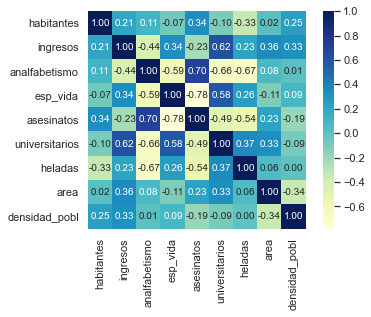

In [11]:
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm
                 ,cmap="YlGnBu"
                 ,cbar=True
                 ,annot=True
                 ,square=True
                 ,fmt='.2f'
                 ,annot_kws={'size': 10}
                 ,yticklabels=df.columns
                 ,xticklabels=df.columns)
plt.show()

Correlacion y el histograma

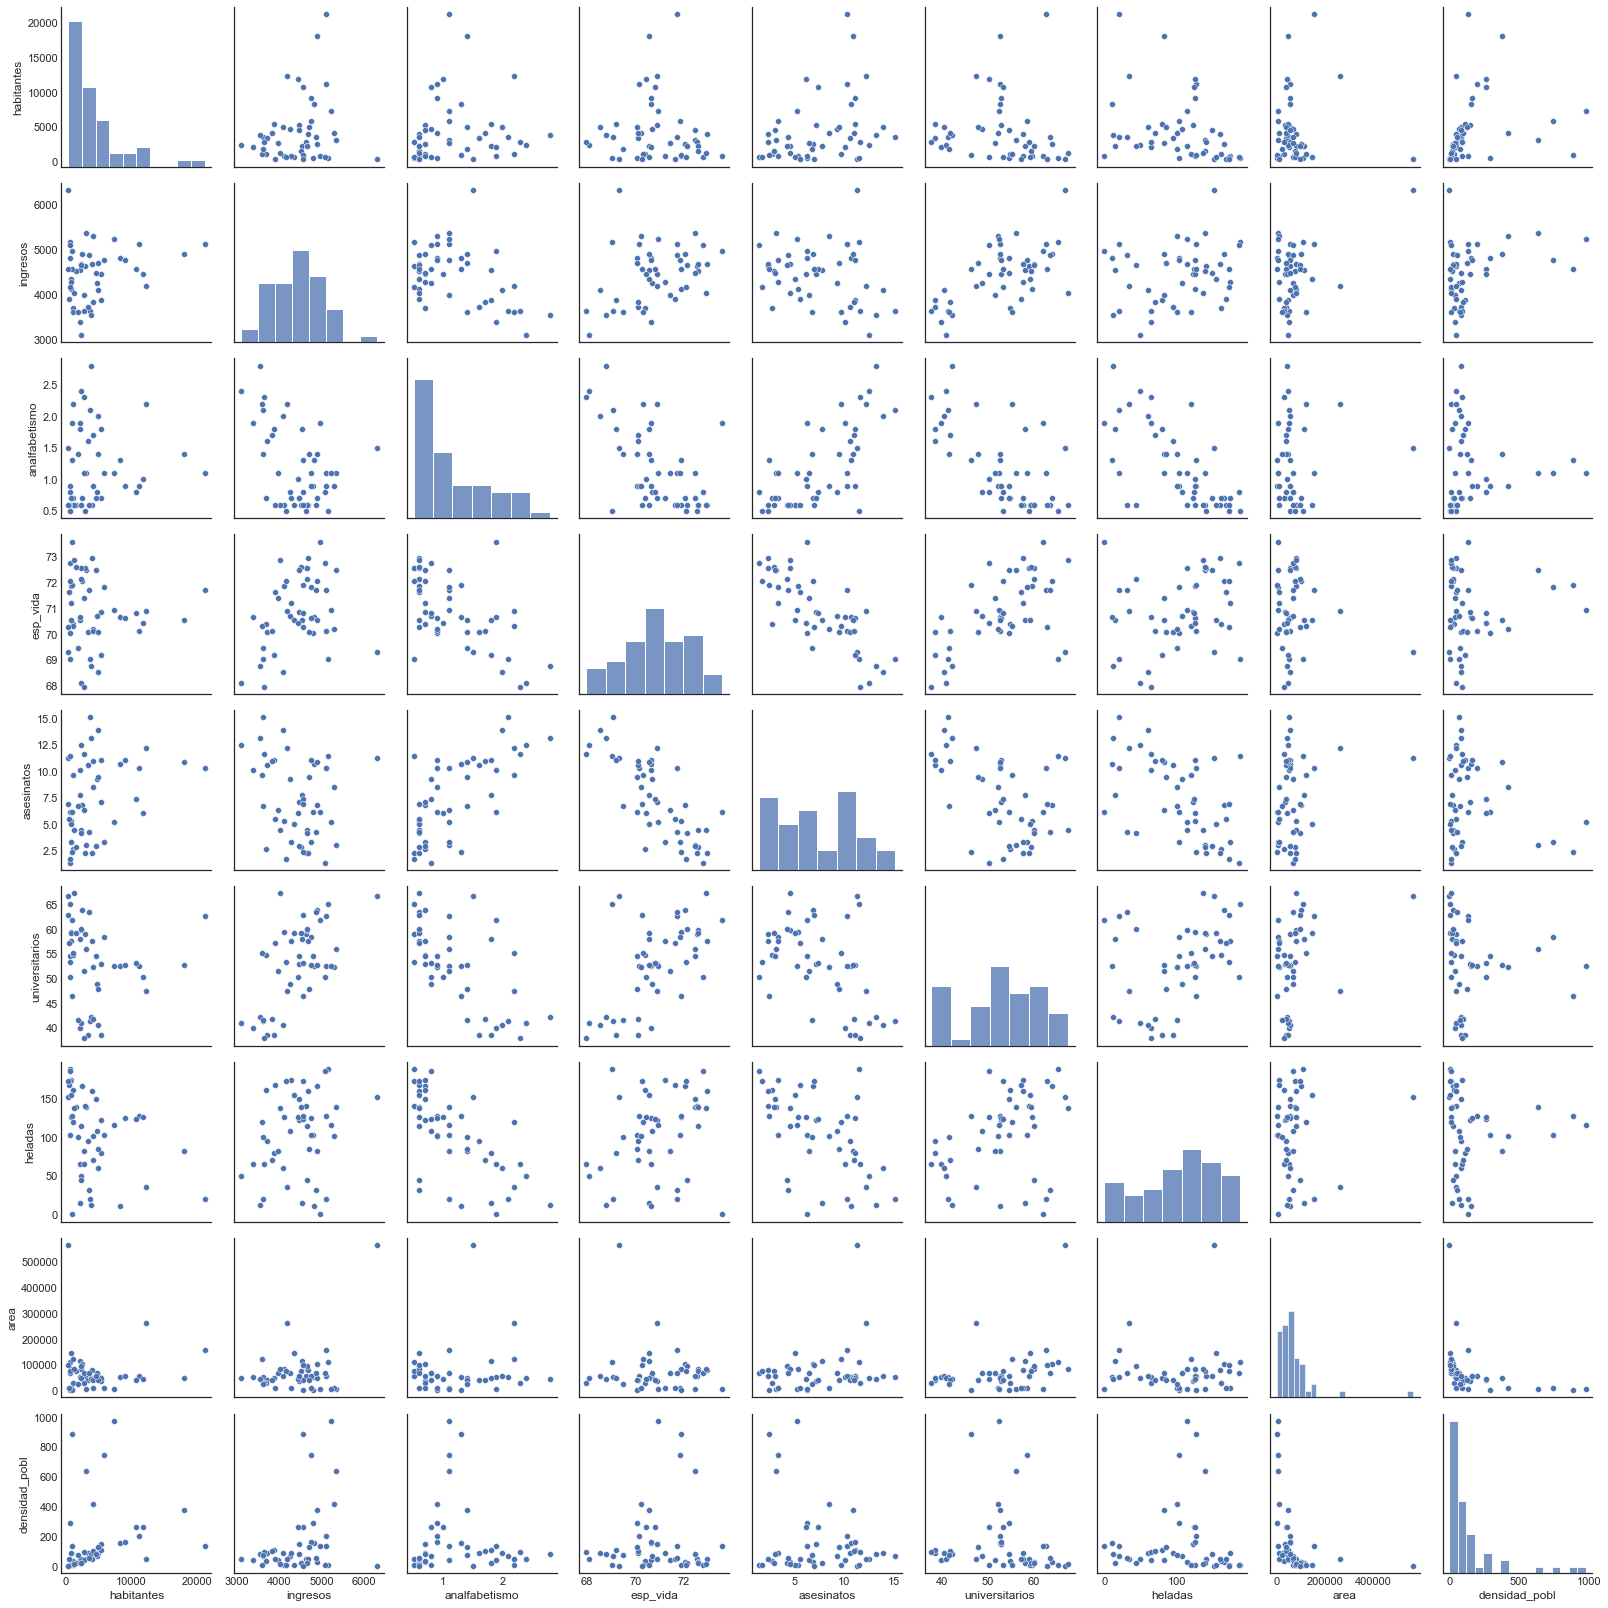

In [12]:
with plt.style.context('seaborn-white'):
    sns.pairplot(df, height=2.5)
    plt.tight_layout()
    plt.grid(True)
plt.show()

## Preparación de datos

In [13]:
# separar variable respuesta del dataset
y = df["esp_vida"].copy()
X = df.drop(["esp_vida"], axis=1)

Creación de conjunto de entrenamiento y de prueba

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.90,
                                        random_state = 42,
                                        shuffle      = False)

# Modelos

Con todas las variables

In [16]:
X_train.columns

Index(['habitantes', 'ingresos', 'analfabetismo', 'asesinatos',
       'universitarios', 'heladas', 'area', 'densidad_pobl'],
      dtype='object')

In [17]:
from statsmodels.formula.api import ols

In [18]:
W = pd.concat([X_train, y_train], axis = 1)
lm1 = ols("esp_vida ~ habitantes + ingresos + analfabetismo + asesinatos + universitarios + heladas + area + densidad_pobl", W)
lm1 = lm1.fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               esp_vida   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     14.66
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           2.97e-09
Time:                        12:52:05   Log-Likelihood:                -44.785
No. Observations:                  45   AIC:                             107.6
Df Residuals:                      36   BIC:                             123.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         70.6820      1.924     36.

Modelo sin analfabetismo

In [19]:
lm2 = ols("esp_vida ~ habitantes + ingresos + asesinatos + universitarios + heladas + area + densidad_pobl", W)
lm2 = lm2.fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               esp_vida   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     17.15
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           7.13e-10
Time:                        12:52:06   Log-Likelihood:                -44.845
No. Observations:                  45   AIC:                             105.7
Df Residuals:                      37   BIC:                             120.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         71.1191      1.293     55.

Modelo sin area

In [20]:
lm3 = ols("esp_vida ~ habitantes + ingresos + asesinatos + universitarios + heladas + densidad_pobl", W)
lm3 = lm3.fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:               esp_vida   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     20.24
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.85e-10
Time:                        12:52:06   Log-Likelihood:                -45.112
No. Observations:                  45   AIC:                             104.2
Df Residuals:                      38   BIC:                             116.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         71.5617      1.100     65.

Modelo sin ingresos

In [21]:
lm4 = ols("esp_vida ~ habitantes + asesinatos + universitarios + heladas + densidad_pobl", W)
lm4 = lm4.fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:               esp_vida   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     24.65
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           4.07e-11
Time:                        12:52:06   Log-Likelihood:                -45.299
No. Observations:                  45   AIC:                             102.6
Df Residuals:                      39   BIC:                             113.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         71.6628      1.076     66.

Modelo sin densidad_pobl

In [22]:
lm5 = ols("esp_vida ~ habitantes + asesinatos + universitarios + heladas", W)
lm5 = lm5.fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:               esp_vida   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     29.76
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.64e-11
Time:                        12:52:06   Log-Likelihood:                -46.320
No. Observations:                  45   AIC:                             102.6
Df Residuals:                      40   BIC:                             111.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         71.1411      1.014     70.

Modelo sin habitantes

In [23]:
lm6 = ols("esp_vida ~ asesinatos + universitarios + heladas", W)
lm6 = lm6.fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:               esp_vida   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     37.18
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           9.00e-12
Time:                        12:52:06   Log-Likelihood:                -47.814
No. Observations:                  45   AIC:                             103.6
Df Residuals:                      41   BIC:                             110.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         71.1170      1.035     68.

## Bondad de ajuste y selección del mejor modelo

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
pred_train1 = lm1.fittedvalues
rmse1 = mean_squared_error(y_train,pred_train1,squared = False)
print(f"El error (rmse1) en el conjunto de entrenamiento es: {round(rmse1,4)}")

El error (rmse1) en el conjunto de entrenamiento es: 0.6546


In [26]:
pred_train2 = lm2.fittedvalues
rmse2 = mean_squared_error(y_train,pred_train2,squared = False)
print(f"El error (rmse2) en el conjunto de entrenamiento es: {round(rmse2,4)}")

El error (rmse2) en el conjunto de entrenamiento es: 0.6555


In [27]:
pred_train3 = lm3.fittedvalues
rmse3 = mean_squared_error(y_train,pred_train3,squared = False)
print(f"El error (rmse3) en el conjunto de entrenamiento es: {round(rmse3,4)}")

El error (rmse3) en el conjunto de entrenamiento es: 0.6594


In [28]:
pred_train4 = lm4.fittedvalues
rmse4 = mean_squared_error(y_train,pred_train4,squared = False)
print(f"El error (rmse4) en el conjunto de entrenamiento es: {round(rmse4,4)}")

El error (rmse4) en el conjunto de entrenamiento es: 0.6621


In [29]:
pred_train5 = lm5.fittedvalues
rmse5 = mean_squared_error(y_train,pred_train5,squared = False)
print(f"El error (rmse5) en el conjunto de entrenamiento es: {round(rmse5,4)}")

El error (rmse5) en el conjunto de entrenamiento es: 0.6773


In [30]:
pred_train6 = lm6.fittedvalues
rmse6 = mean_squared_error(y_train,pred_train6,squared = False)
print(f"El error (rmse6) en el conjunto de entrenamiento es: {round(rmse6,4)}")

El error (rmse6) en el conjunto de entrenamiento es: 0.7002


In [31]:
RMSE = [rmse1,rmse2,rmse3,rmse4,rmse5,rmse6]
AIC = [lm1.aic,lm2.aic,lm3.aic,lm4.aic,lm5.aic,lm6.aic]
BIC = [lm1.bic,lm2.bic,lm3.bic,lm4.bic,lm5.bic,lm6.bic]
indices = ['lm1','lm2','lm3','lm4','lm5','lm6']

resultados = pd.DataFrame()
resultados['RMSE'] = RMSE
resultados['AIC'] = AIC
resultados['BIC'] = BIC

resultados.index = indices

resultados

,RMSE,AIC,BIC
lm1,0.654605,107.569417,123.829380
lm2,0.655478,105.689304,120.142604
lm3,0.659380,104.223462,116.870099
lm4,0.662126,102.597546,113.437521
lm5,0.677322,102.639648,111.672960
lm6,0.700196,103.628943,110.855593


# Análisis de residuos

## Normalidad

In [32]:
residuos_train = lm6.resid

In [33]:
import statsmodels.api as sm

<Figure size 1440x1440 with 0 Axes>

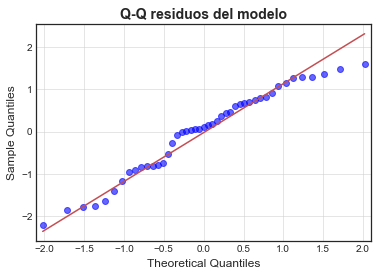

In [34]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(20, 20))

    sm.qqplot(
        residuos_train,
        fit   = True,
        line  = 'q',
        color = "blue",#'firebrick',
        alpha = 0.6,
        lw    = 2
    )

    plt.title('Q-Q residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

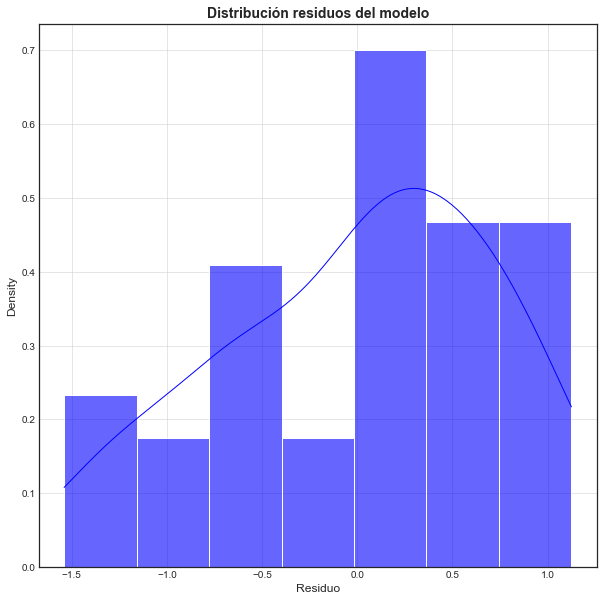

In [35]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",#"firebrick",
        alpha   = 0.6
    )

    plt.title('Distribución residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.xlabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [36]:
import scipy.stats as stats

In [37]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
k1, p_value = stats.shapiro(residuos_train)
print(f"Shapiro test: Estadístico= {k1}, p-value = {p_value}")

Shapiro test: Estadístico= 0.9570634365081787, p-value = 0.0943504273891449


Test de Shapiro-Wilk

$H_0$: La distribución es normal

$H_1$: La distribución no es normal

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

In [38]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"D'Agostino's K-squared test: Estadístico= {k2}, p-value = {p_value}")

D'Agostino's K-squared test: Estadístico= 3.1599342085109487, p-value = 0.20598187402053983


Test de D'Agostino's K-cuadrado

$H_0$: La distribución es normal

$H_1$: La distribución no es normal

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

## Residuos con media cero

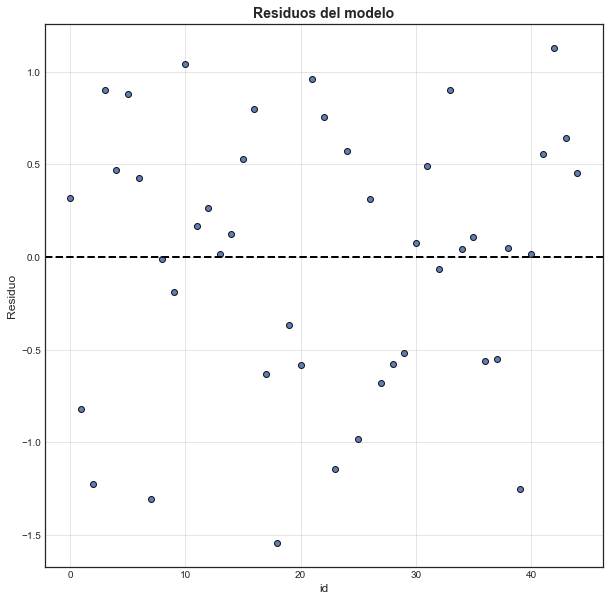

In [39]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.9)
    plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    plt.title('Residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.xlabel('id')
    plt.ylabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [40]:
med_res = round(np.mean(residuos_train),2)
print(f"La media de los residuos es {med_res}")

La media de los residuos es 0.0


## Homocedasticidad

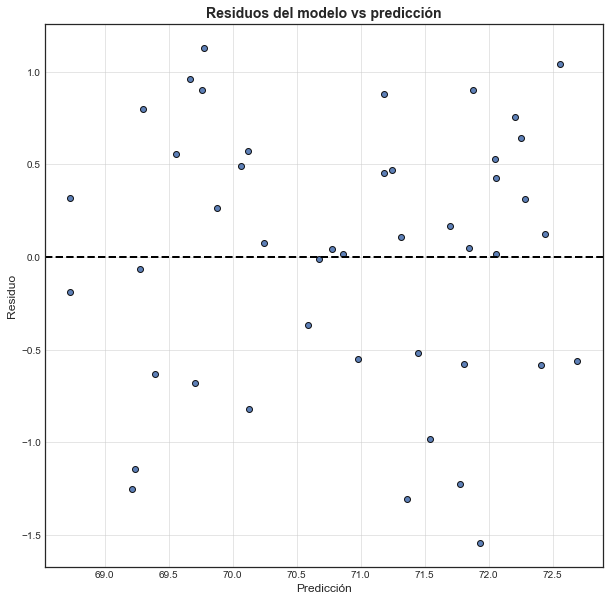

In [41]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(pred_train6, residuos_train, edgecolors=(0, 0, 0), alpha = 0.9)
    plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    plt.title('Residuos del modelo vs predicción', fontsize = 14, fontweight = "bold")
    plt.xlabel('Predicción')
    plt.ylabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [42]:
import statsmodels.stats.api as sms

In [43]:
p_value = sms.het_breuschpagan(resid = lm6.resid, exog_het = lm6.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f"%(p_value))

El resultado del test Breusch-Pagan es: p.valor = 0.944


Test de Breusch-Pagan

$H_0$: La homocedastidad está presente

$H_1$: La heterocedastidad está presente

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

## Independencia

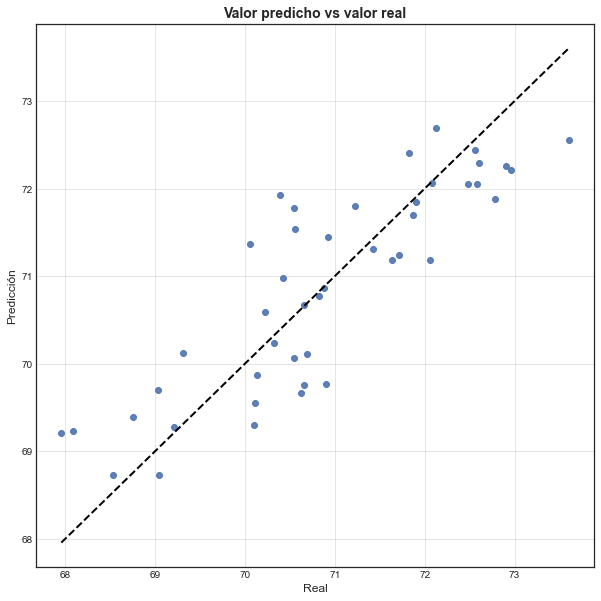

In [44]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_train, pred_train6, alpha = 0.9)
    plt.plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [45]:
from statsmodels.stats.stattools import durbin_watson

In [46]:
est_dw = round(durbin_watson(residuos_train),2)

print(f"El resultado del test de Durbin-Watson es: Estadístico = {est_dw}")

El resultado del test de Durbin-Watson es: Estadístico = 1.8


Test de Durbin-Watson

$H_0$: Los residuos son independientes

$H_1$: Los residuos no son independientes

El estadístico se encuentra entre 1.5 y 2.5, no se rechaza la hipótesis nula.

# Análisis de outliers y puntos influyentes

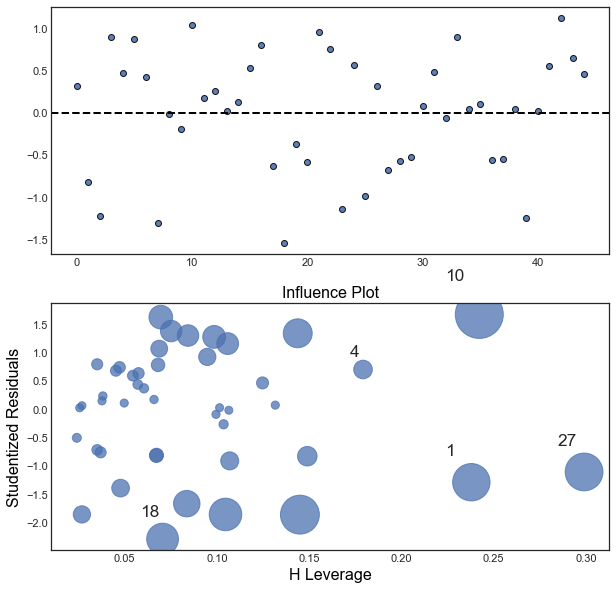

In [47]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax.scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.9)
    ax.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    #ax.scatter(30, 10, color = "red")
    #ax.plot(np.sort(x4), y40[np.argsort(x4)], label = "actual line")
    
    sm.graphics.influence_plot(lm6, ax = ax2, criterion="cooks")
plt.show()

# Modelo y predicciones

Parámetros del modelo

In [48]:
print('Parámetros: \n', lm6.params)

Parámetros: 
 Intercept         71.116998
asesinatos        -0.291036
universitarios     0.052414
heladas           -0.007874
dtype: float64


Recta de regresión:

$y =   71.116998-0.291036*asesinatos+0.052414*universitarios-0.007874*heladas$

Error estándar

In [49]:
print('Standard errors: \n', lm6.bse)

Standard errors: 
 Intercept         1.034909
asesinatos        0.038162
universitarios    0.016113
heladas           0.002625
dtype: float64


Valor de $R^2$

In [50]:
print('El valor de R^2 es:', round(lm6.rsquared,4))

El valor de R^2 es: 0.7312


Valor de $R^2$ adjustado

In [51]:
print('El valor de R^2 es:', round(lm6.rsquared_adj,4))

El valor de R^2 es: 0.7116


Intervalo de confianza

In [52]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = lm6.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
Intercept,69.026957,73.207038
asesinatos,-0.368105,-0.213967
universitarios,0.019874,0.084955
heladas,-0.013175,-0.002573


Estimador de la varianza

In [53]:
y_rest = (y_train - pred_train6)**2
yMLE = sum(y_rest)/(len(y_train))
print("El valor por MLE es:", round(yMLE,4))

El valor por MLE es: 0.4903


In [54]:
yOLS = sum(y_rest)/(len(y_train)-2)
print("El valor por OLS es:", round(yOLS,4))

El valor por OLS es: 0.5131


Predicciones con intervalos de confianza

In [55]:
# seleccionar predictor---------------------------------------------
X1_test = X_test.copy()
# Predicciones---------------------------------------------
predicciones = lm6.get_prediction(exog = X1_test)
pred = predicciones.summary_frame(alpha=0.05)
pred.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,70.188256,0.133215,69.919224,70.457288,68.682577,71.693935
1,72.941885,0.330371,72.274687,73.609083,71.317125,74.566645
2,70.560074,0.224918,70.105843,71.014306,69.010552,72.109596
3,71.927217,0.181855,71.559954,72.294480,70.400923,73.453511


Gráfica de predicciones y valores reales

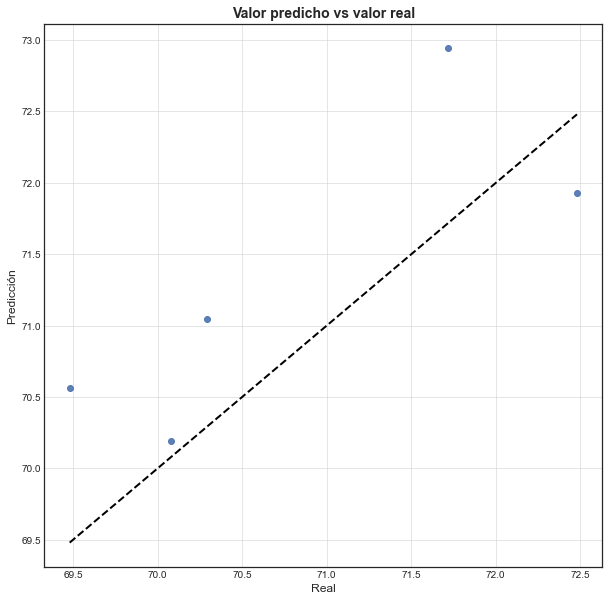

In [56]:
pred_test = lm6.predict(X1_test)

with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_test, pred_test, alpha = 0.9)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

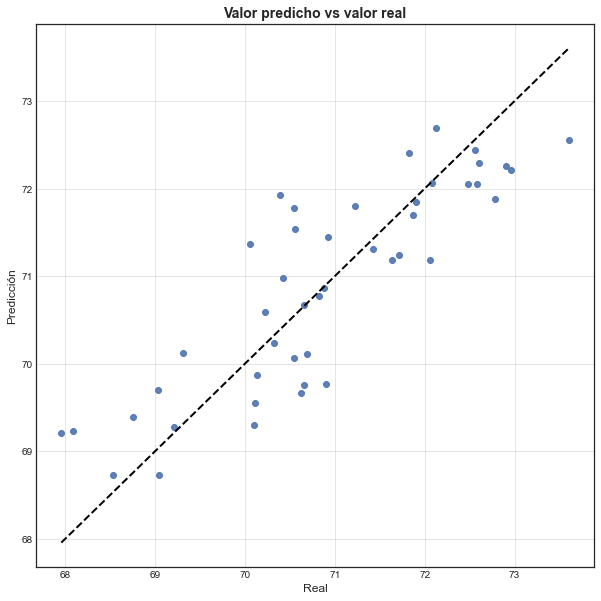

In [57]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_train, pred_train6, alpha = 0.9)
    plt.plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

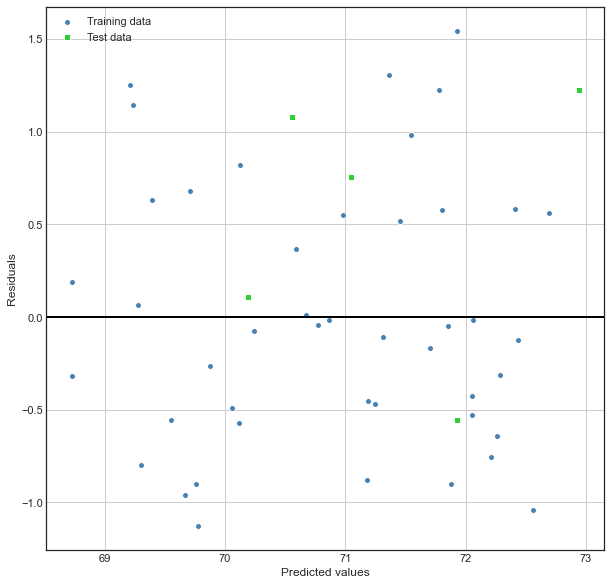

In [58]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(pred_train6, pred_train6 - y_train, c='steelblue', marker='o', edgecolor='white',label='Training data')
    plt.scatter(pred_test, pred_test - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.axhline(y = 0, linestyle = '-', color = 'black', lw=2)
    plt.grid()
plt.show()

In [59]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, pred_train6),mean_squared_error(y_test, pred_test)))

MSE train: 0.490, test: 0.709


In [60]:
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, pred_train6),r2_score(y_test, pred_test)))

R^2 train: 0.731, test: 0.427


Elaborado por Jairo Rojas